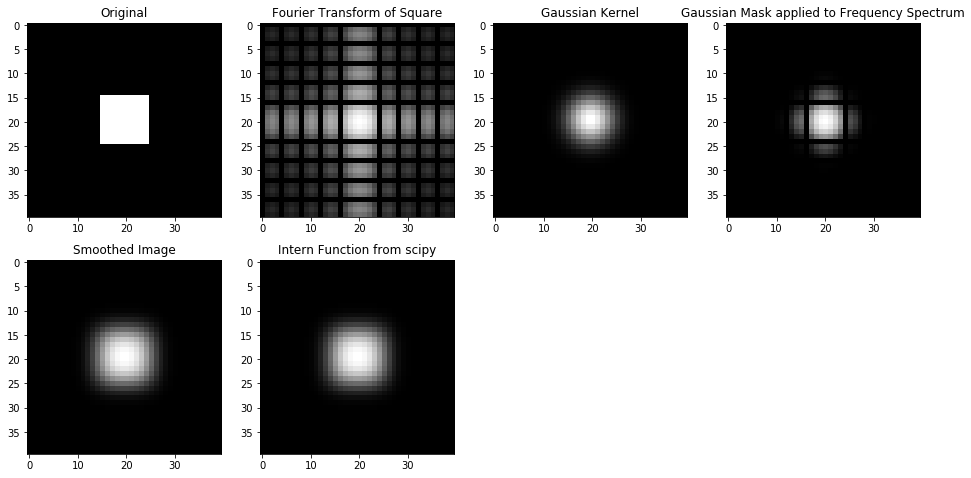

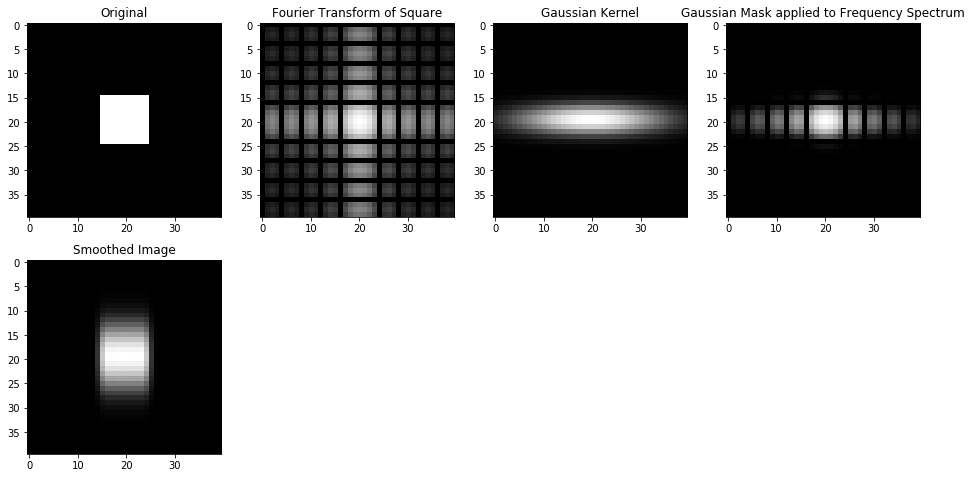

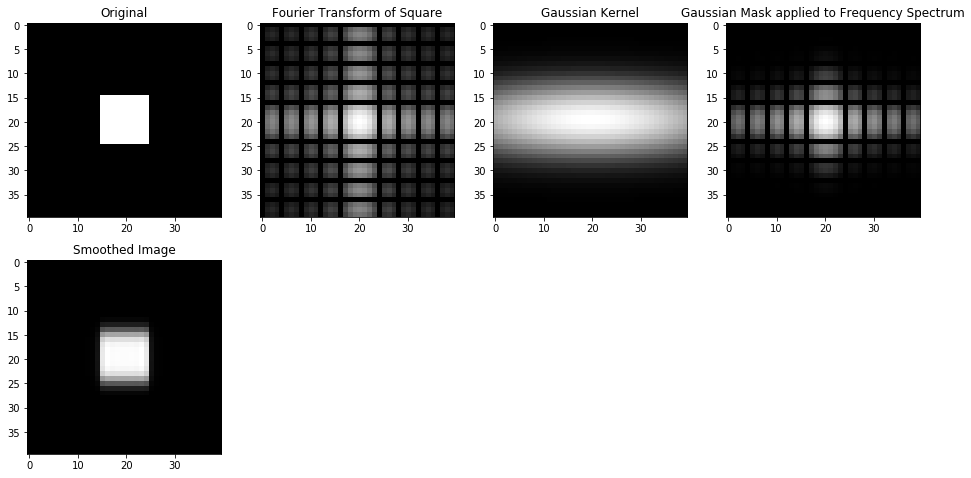

In [3]:
import skimage
%matplotlib inline
from skimage import io
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.figure(1,figsize=(16,8))
number = 0
def next_item_to_figure(data, type_of_data, title):
    global number 
    number += 1
    lines = 2
    columns = 4
    plt.subplot(lines*100+columns*10+number)
    plt.title(title)
    if type_of_data == 'img':
        plt.imshow(data,'gray')
    if type_of_data == 'fft':
        plt.imshow(np.log(1+np.abs(data)),'gray')

def generate_square():
  sq = np.zeros((40,40))
  sq[15:25,15:25] = 1
  return sq

def frequency_smoothing(img, sigma, sigma_y=None):
    if sigma_y==None:
        sigma_y=sigma
    def generate_fourier_transform(my_img):
        return np.fft.fftshift(np.fft.fft2(my_img))
    def generate_gaussian_mask(shape, sigma, sigma_y=None):
        if sigma_y==None:
            sigma_y=sigma
        rows, cols = shape

        def get_gaussian_fct(size, sigma):
            fct_gaus_x = np.linspace(0,size,size)
            fct_gaus_x = fct_gaus_x-size/2
            fct_gaus_x = fct_gaus_x**2
            fct_gaus_x = fct_gaus_x/(2*sigma**2)
            fct_gaus_x = np.exp(-fct_gaus_x)
            return fct_gaus_x

        mask = np.outer(get_gaussian_fct(rows,sigma), get_gaussian_fct(cols,sigma_y))
        return mask

    next_item_to_figure(img, 'img', 'Original')

    fft_img = generate_fourier_transform(img)
    next_item_to_figure(fft_img,'fft','Fourier Transform of Square')
    
    gaus_mask = generate_gaussian_mask(fft_img.shape, sigma, sigma_y)
    next_item_to_figure(gaus_mask,'fft','Gaussian Kernel')

    new_fft = gaus_mask*fft_img
    next_item_to_figure(new_fft,'fft','Gaussian Mask applied to Frequency Spectrum')

    smoothed_image = np.abs(np.fft.ifft2(new_fft))
    return smoothed_image

my_sigma = 3
out = frequency_smoothing(generate_square(), my_sigma)
next_item_to_figure(out, 'img', 'Smoothed Image')


from scipy.ndimage.filters import gaussian_filter
intern_gaus = gaussian_filter(generate_square(), sigma=my_sigma)      
next_item_to_figure(out, 'img', 'Intern Function from scipy')


###### BONUS ######
plt.figure(2,figsize=(16,8))
number = 0

various_non_isotropic_curves = frequency_smoothing(generate_square(), 2,10)
next_item_to_figure(various_non_isotropic_curves, 'img', 'Smoothed Image')

plt.figure(3,figsize=(16,8))
number = 0

various_non_isotropic_curves = frequency_smoothing(generate_square(), 5,20)
next_item_to_figure(various_non_isotropic_curves, 'img', 'Smoothed Image')

?np.outer

In [1]:
# EXPERIMENTS NOBODY NEEDS
def generate_gaussian_mask_old(shape, sigma, center_x=0, center_y=0):
    rows, cols = shape
    x_shift = rows/2
    y_shift = cols/2
    def gaussian_func_2d(x,y, sigma, center_x,center_y, sigma_y=None):
        if sigma_y==None:
            sigma_y=sigma
        return np.exp(-(((x-center_x)**2/(2*sigma**2))+((y-center_y)**2/(2*sigma_y**2))))
    
    def get_x_and_y_shifted_to_use_in_func(x_coord,y_coord):
        return x_coord,y_coord
        return x_coord-x_shift, y_coord-y_shift
    
    mask = np.zeros(shape)    
    for row in range(0,rows):
        for col in range(0,cols):
            myx,myy=get_x_and_y_shifted_to_use_in_func(row,col)
            mask[row][col] = gaussian_func_2d(x=myx,y=myy,sigma=sigma,
                                              center_x=center_x,center_y=center_y)
    
    #print np.unique(mask)
    return mask

def generate_gaussian_mask2(shape, sigma, sigma_y=None):
    if sigma_y==None:
        sigma_y=sigma
    rows, cols = shape
    
    gaus_x = signal.gaussian(rows, std=sigma).reshape(rows, 1)
    gaus_y = signal.gaussian(cols, std=sigma_y).reshape(cols, 1)
    
    mask = np.outer(gaus_x, gaus_y)
    return mask

Object `np.outer` not found.
